# SOK-1006 V23

## Forelesning 9 - Bedriftens inntekter og kostnader

### 1. Bedriftens innteker og kostnader
Vi vil beskrive bedriftens atferd i produkt- og faktormarkedene på kort og lang sikt. For å kunne gjøre dette vil vi anta at bedriften tar produktprisen og faktorprisene for gitt. (Analyse av bedrifter med *markedsmakt* møter dere i SOK-2030 Næringsøkonomi og konkurransestrategi). Når bedriften selger én enhet på produktmarkedet får den en fast pris på $p$. Med $x$ solgte enheter får bedriften en inntekt (R) på
$$ R(x)=px.$$
Det vil si at gjennomsnittsinntekt per enhet solgt er $\frac{R(x)}{x}=\frac{px}{x}=p$, og grenseinntekten er $R'(x)=\frac{dR}{dx}=p$.      
For å produsere goder eller tjenester må bedriften ansette produksjonsfaktorer, noe som gir bedriften en kostnad. Kostnaden kan være fast, dvs uavhengig av hvor mange enheter som produseres: $C_f.$ Produksjonsavhengige kostnader er variable kostnader $C_v(x)$ som avhenger av mengden produsert. Totale kostnader blir da summen av disse: $C(x)=C_f+C_v(x).$         
Dersom bedriften produserer én enhet ekstra ut fra dagens produksjonsnivå vil økningen i kostnaden kjennetegnes av grensekostnaden:
$$C'(x)=\frac{dC}{dx}=\frac{dC_v}{dx}.$$

Beløpet som det koster bedriften per enhet produsert er den totale gjennomsnittskostnaden ($\overline{C}$), og dette er summen av faste gjennomsnittskostnader ($\overline{C}_f$) og variable gjennomsnittskostnader ($\overline{C}_v$):
$$ \overline{C} = \overline{C}_f+\overline{C}_v = \frac{\overline{C}_f}{x} +\frac{\overline{C}_v(x)}{x}.$$


### 2. Kostnader på kort sikt

Vi skal skrive kostnadsfunksjonen på kort sikt som en funksjon av hvor mange enheter bedriften produserer. På kort sikt er det minst én produksjonsfaktor som er fast.       

**Oppgave**      

En bedrift produserer goder med følgende produktfunksjon:


\begin{equation}
    x = f(N,K)=N^{0.5}K^{0.5}\tag{1}
\end{equation}

På kort sikt har bedriften tilgang til begrenset kapital $K_0=10$. Prisen per enhet kapital er fast $r=500$ NOK, mens én time med arbeidskraft koster $w=350$ NOK. På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. Bedriften leier et bygg til produksjonen av produktet, og dette koster 10 000 NOK (faste kostnader).      
a) Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(x, K_0)$. Tegn denne funksjon i en figur med produksjon på den horisontale aksen. Tegn også kostnadsfunksjonen som oppstår når kapitalbeholdningen økes til $K_1=50$. Kommenter dine funn.   
b) I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt. Kommenter og forklar forholdet mellom total og variabel gjennomsnittskostnad og grensekostnaden.       
c) Hvilke skalaegenskaper viser denne produktfunksjon?

In [13]:
# skriv ditt svar her
# a)
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

x, N, K , w , r = sp.symbols('x N K w r ', positive=True, real=True)

def prod(N,K):
    produktfunksjon= N**(0.5)*K**(0.5)
    return produktfunksjon

prod(N,K)

def kost(N,K,w,r):
    kostnadsfunksjon= N*w + K*r + 10000
    return kostnadsfunksjon

kost(N,K,w,r)

n_sol = sp.solve(prod(N,K)- x, N)[0]
n_sol

x**2/K

In [2]:
kost(n_sol,K,350,500)

500*K + 10000 + 350*x**2/K

In [98]:
def fn(K,x):
    return 500*K+10000+(350*x**2)/K

fn(K,x)

500*K + 10000 + 350*x**2/K

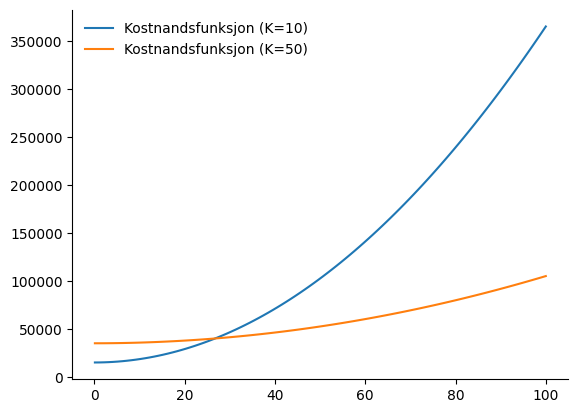

In [15]:
x_num = np.linspace(0.1,100,100)

fig1, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, tot_prodkost(10,x_num), label = 'Kostnandsfunksjon (K=10)')
ax.plot(x_num, tot_prodkost(50,x_num), label = "Kostnandsfunksjon (K=50)")

ax.legend(loc = 'best', frameon = False);

In [103]:
def g_kost(K,x):
    return fn(K,x)/x

def v_kost(K,x):
    variablegjennomsnittkostnader = (fn(K,x)-10000)/x
    return variablegjennomsnittkostnader

def grensekostnad(K,x):
    grensekostnad= sp.diff(fn(K,x),x)
    return grensekostnad

grensekostnad_lamb = sp.lambdify((K,x),grensekostnad(K,x))

Grensekostnaden skjærer gjennomsnittskostnadene i bunnpunktene, dvs når gjennomsnittskostnandene er lavest.
Summen av eksponentene er lik 1 og det er konstant skalautbytte.
Vi kan tolke dette som at kostnaden ved å produsere litt ekstra er konstant, uansett hvor mye man produserer.


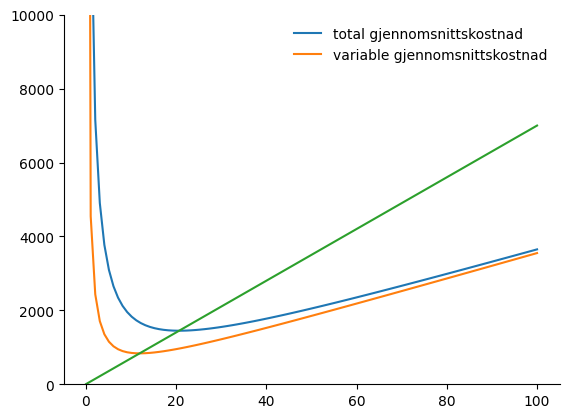

In [101]:
fig ,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.plot(x_num,g_kost(10,x_num), label = 'total gjennomsnittskostnad')
ax.plot(x_num,v_kost(10,x_num), label = 'variable gjennomsnittskostnad')
ax.plot(x_num,grensekostnad_lamb(10,x_num))
ax.set_ylim(0,10000)
ax.legend(loc = 'best', frameon = False);

print('Grensekostnaden skjærer gjennomsnittskostnadene i bunnpunktene, dvs når gjennomsnittskostnandene er lavest.')
print('Summen av eksponentene er lik 1 og det er konstant skalautbytte.')
print('Vi kan tolke dette som at kostnaden ved å produsere litt ekstra er konstant, uansett hvor mye man produserer.')

### 3. Kostnader på lang sikt - Kostnadsminimering
På lang sikt kan bedriften velge hvor mye av hver faktor som skal ansettes. Dette, sammen med evt. faste kostnader, vil bestemme produksjonskostnaden. Hvordan velger bedrifter faktorinnsatsen? Det er naturlig å tenke at bedriften vil maksimere sin fortjeneste (dette er ikke eneste mulighet, men et nauturlig utgangspunkt for mange produsenter). Gitt at bedriften tar alle priser for gitt vil en produsert mengde $x$ gi en inntekt på $px$ NOK. Å maksimere fortjeneste er da det samme som å minimere kostnaden for å prodsuere denne mengden. Gitt at bedriften tar priser i faktormarkedet for gitt vil det koste $wN$ å ansette $N$ enheter med arbeidskraft, $rK$ å ansette $K$ enheter med kapital, $tS$ å bruke $S$ Kw/t med strøm osv (w er timelønn, r er rente, t er prisen på strøm her). Summen av disse utgiftene er det som bedriften vil minimere ved optimale valg av innsatsfaktorer. Vi kan se bort fra faste kostnader i beregningen (skjønner du hvorfor?).       
Minimeringsproblemet til bedriften er da
$$ minimer \;\; C\;\; for\;\; x=x_0$$
hvor $x_0$ er mengden som bedriften ønsker å produsere. Tenk at vi har kun to faktorer, arbeidskraft og kapital, og bedriften bruker følgende teknologi: $x=f(N,K)$. Da kan vi skrive kostnadsminimeringsproblemet som:        
$$ min_{N,K}\;wN+rK \;\; ubb\;\; x_0=f(N,K).$$
Subskriften ved siden av "min" viser hvilke variabler det er vi skal velge (dvs de endogene variablene), og "ubb" betyr "under bibetingelse". Dere har sett slike problem før i BED-1007; dette løses ved hjelp av Lagrange metoden (se Appendiks 5.1 på s. 165 i boka).         

Vi setter opp Lagrange funksjonen:
$$L = wN+rK-\lambda (f(N,K)-x_0)$$
hvor $\lambda$ er en Lagrange multiplikator som viser verdien av å gjøre bibetingelsen mindre streng. I dette tilfellet viser det økningen i kostnaden dersom vi øke produskjonen med én enhet (**har du hørt om det før?**). Vi deriverer $L$ med hensyn på $N,K,\lambda$:

$$\begin{align}
\frac{\partial L}{\partial N} &= w - \lambda f'_N = 0 \tag {2}\\
\frac{\partial L}{\partial K} &= r - \lambda f'_K = 0 \tag {3}\\
\frac{\partial L}{\partial \lambda} &= x_0-f(N,K) = 0 \tag {4}\\
\end{align}$$

Legg merke til at (4) innebærer at løsningen som vi finner må tilfredsstille bibetingelsen. Vi kan skrive om (2) og (3):

$$\begin{align}
w &= \lambda f'_N \tag {5}\\
r &= \lambda f'_K \tag {6}\\
\end{align}$$

Deler vi (5) på (6) får vi

$$
\frac{w}{r}=\frac{f'_N}{f'_K} \tag{7}
$$
Tolkningen av (7) er at den relative prisen på arbeidskraft (venstre side) er lik den marginale tekninske substitusjonsbrøken (MTSB, se forelesning 7). Hvorfor er dette optimalt? Tenk at $\frac{w}{r}=2$ mens $\frac{f'_N}{f'_K}=MTSB=1$. Sistnevnte forteller at vi kan holde produskjonen konstant (ved målet som er $x_0$) dersom vi bytter 1N for 1K, og den relative prisen på arbeidskraft forteller at vi kan kjøpe 2K dersom vi gir opp 1N. Dvs til samme kostnad kan vi nå produsere mer ved å endre sammensetningen av innsatsfaktorene. Da kan utgangspunktet ikke være optimalt. **Fullfør resonnementet selv for å vise at $\frac{w}{r}=1$, og $\frac{f'_N}{f'_K}=MTSB=2$ ikke kan angi en optimal løsning.** Eneste mulighet som er igjen - og som viser en kostnadsminimerende løsning - er den som er gitt ved (7). Da har vi følgende *to ting* som er oppfylt for en kostnadsminimerende kombinasjon av $N,K$:

$$\begin{align}
\frac{w}{r}&=\frac{f'_N}{f'_K} \tag{7}\\
x_0 &=f(N,K) \tag {8}\\
\end{align}$$

(7) sikrer at kombinasjonen av $N,K$ som velges minimerer produksjonskostnaden, og (8) sikrer at denne kombinasjonen produserer målet $x_0$.

#### 3.1 Et eksempel
La oss gå tilbake til bedriften som bruker produktfunksjonen i (1). Vi skal undersøke bedriftens valg av kostnadsminimerende innsatsfaktorer.

In [5]:
# importer pakker

import sympy as sp

In [6]:
# definer symboler. X blir produksjonsmålet, lmda er Lagrange multiplikatoren
N,K,X,lmda,w,r=sp.symbols('N K X \lambda, w, r', real=True, positive=True)

In [7]:
def x(N,K):
    return (N**.5)*(K**.5)
x(N,K)

K**0.5*N**0.5

Målet er å minimere $w N + r K$ for en gitt produksjon $X$ gitt produktfunksjon $x=K^{0.5} N^{0.5}$ med hensyn til $K$ og $N$. Lagrange er da $L=w N +r K - \lambda (K^{0.5} N^{0.5}-X)$

In [8]:
# Lagrange likning
L=w*N + r*K-lmda*(x(N,K)-X)

In [9]:
# deriver mhp N og K

dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)
display (foc_N)
display (foc_K)

Eq(-0.5*K**0.5*\lambda/N**0.5 + w, 0)

Eq(-0.5*N**0.5*\lambda/K**0.5 + r, 0)

Dette er likning (2) og (3) for vårt eksempel. La oss prøve å skrive dette i formen på (7):

In [10]:
display (dL_N.args)
display (dL_K.args)
# dette viser plasseringen av elementene i listene

(w, -0.5*K**0.5*\lambda/N**0.5)

(r, -0.5*N**0.5*\lambda/K**0.5)

In [11]:
# da kan vi skrive den rel prisen på arbeidskraft (w/r) som
rel_w=(dL_N.args[0]/dL_K.args[0])

# og mtsb som
mtsb=(dL_N.args[1]/dL_K.args[1])

# sett disse lik som i likning (7)
optimal=sp.Eq(rel_w,mtsb)
display(optimal)

Eq(w/r, 1.0*K**1.0/N**1.0)

Da er likning (7): $\frac{w}{r}=\frac{K}{N}$. **Legg merke til hva dette forteller oss! Dette gir oss det relative forholdet mellom K og N i en optimal løsning.**

**Oppgave**         
*Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)? Undersøk din løsning ved å kjøre samme analyse som ovenfor med en generell Cobb-Douglas produktfunksjon $x=N^aK^b$, hvor $a,b>0$ er produksjonselastisitetene til arbeidskraft og kapital.*

In [12]:
# Skriv ditt svar her
